**goal**: Repeat steps of the first project with new data base. Make new observations.

Used data base: [IMDb movies extensive dataset](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset).

In [1]:
import pandas as pd
%matplotlib inline

PATH_MOVIELENS = '/media/l3m/LinuxFilesBig/1-datasets/IMDb/'

<br>

#### Preliminary step: Load data bases

Load data base with movies:

In [2]:
movies = pd.read_csv(PATH_MOVIELENS+'IMDb movies.csv', index_col=0)
movies.head(3)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0


<br>

Remove some redundants columns. Rename some others.<br>
(*Columns 'usa_gross_income', 'worlwide_gross_income', 'metascore' have too little values to analyze them.<br>
Columns 'budget' is empty at 72% and nontains value in different currencies.*)

In [3]:
movies.drop(['original_title', 'date_published', 'director', 'writer', 'production_company', 'actors',
             'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore'],
            axis=1, inplace=True)

movies.rename(columns={'avg_vote':'av_rating', 'votes':'nmb_ratings'}, inplace=True)
movies.rename_axis('imdb_id', axis='rows', inplace=True)

movies.head(3)

,title,year,genre,duration,country,language,description,av_rating,nmb_ratings,reviews_from_users,reviews_from_critics
imdb_id,,,,,,,,,,,
tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,NaN,True story of notorious Australian outlaw Ned ...,6.1,537,7.0,7.0
tt0001892,Den sorte drøm,1911,Drama,53,"Germany, Denmark",NaN,Two men of high rank are both wooing the beaut...,5.9,171,4.0,2.0
tt0002101,Cleopatra,1912,"Drama, History",100,USA,English,The fabled queen of Egypt's affair with Roman ...,5.2,420,24.0,3.0


<br>

Combine reviews from users and critics.

In [4]:
movies['reviews'] = movies['reviews_from_users'] + movies['reviews_from_critics']

movies.drop(['reviews_from_users', 'reviews_from_critics'],
            axis=1, inplace=True)

movies.head(3)

,title,year,genre,duration,country,language,description,av_rating,nmb_ratings,reviews
imdb_id,,,,,,,,,,
tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,NaN,True story of notorious Australian outlaw Ned ...,6.1,537,14.0
tt0001892,Den sorte drøm,1911,Drama,53,"Germany, Denmark",NaN,Two men of high rank are both wooing the beaut...,5.9,171,6.0
tt0002101,Cleopatra,1912,"Drama, History",100,USA,English,The fabled queen of Egypt's affair with Roman ...,5.2,420,27.0


<br>

Some checks.

In [5]:
from datetime import date
current_year = date.today().year

#Alternative:
# from datetime import datetime
# current_year = datetime.now().year  # but datetime.now() returns more information,
                                      # so for such case it's worse

assert movies['year'].notnull().all(), "There're movies without a year information"
assert (movies['year'] >= 1874).all(), "There's year less than 1874. It's interesting."
assert (movies['year'] <= current_year).all(), "There's year greater than current"

assert movies['av_rating'].notnull().all(), "There're movies without rating"
assert (movies['av_rating'] >= 1.0).all(), "There're movie with rating less than 1.0"
assert (movies['av_rating'] <= 10.0).all(), "There're movie with rating more than 10.0"

<br>

Sort movies by year.

In [6]:
movies.sort_values(by='year', inplace=True)

<br>

Some cells in the columns 'reviews_from_users' and 'reviews_from_critics' contain `NaN` values. Change them to `0`. It can be not fully correct but allow to simplify further processing of information.

Also transform type of data in these columns from `float` to `int`.

In [7]:
movies['reviews'].fillna(0, inplace=True)

movies['reviews'] = movies['reviews'].astype('int')

movies.dtypes

title           object
year             int64
genre           object
duration         int64
country         object
language        object
description     object
av_rating      float64
nmb_ratings      int64
reviews          int64
dtype: object

<br>
Change order of columns.

In [8]:
cols = movies.columns.tolist()
cols = cols[:3] + cols[7:] + cols[3:7]
movies = movies[cols]

movies.head(3)

,title,year,genre,av_rating,nmb_ratings,reviews,duration,country,language,description
imdb_id,,,,,,,,,,
tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",6.1,537,14,70,Australia,NaN,True story of notorious Australian outlaw Ned ...
tt0191323,Oborona Sevastopolya,1911,"History, War",6.0,130,0,100,Russia,NaN,First film ever that was shot by two cameras. ...
tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",7.0,2019,42,68,Italy,Italian,Loosely adapted from Dante's Divine Comedy and...


<br>
<br>

#### Goal 1: Plot different characteristics of movies per year

In [9]:
year_begin = 0
year_end = 1950

Find earliest and latest movies in the DataFrame. Use this information to correct variables `year_begin` and `year_end` to eliminate blank ends.

In [10]:
earliest_movie = movies['year'].min()
latest_movie = movies['year'].max()

year_begin = max(year_begin, earliest_movie)
year_end = min(year_end, latest_movie)

year_begin, year_end

(1906, 1950)

<br>

Create subset of 'movies' DataFrame to work with it more conveniently:

In [11]:
mvs = movies[(movies['year'] >= year_begin) & (movies['year'] <= year_end)]

mvs.head()

,title,year,genre,av_rating,nmb_ratings,reviews,duration,country,language,description
imdb_id,,,,,,,,,,
tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",6.1,537,14,70,Australia,NaN,True story of notorious Australian outlaw Ned ...
tt0191323,Oborona Sevastopolya,1911,"History, War",6.0,130,0,100,Russia,NaN,First film ever that was shot by two cameras. ...
tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",7.0,2019,42,68,Italy,Italian,Loosely adapted from Dante's Divine Comedy and...
tt0266688,Karadjordje,1911,"Drama, War",6.3,145,0,80,Serbia,Serbian,This is the oldest found dramatic film from Se...
tt0001892,Den sorte drøm,1911,Drama,5.9,171,6,53,"Germany, Denmark",NaN,Two men of high rank are both wooing the beaut...


<br>

Some simple statistics about this period just for general familiarization:

In [12]:
print('Number of movies                   :', len(mvs))
print('Average rating of all movies       :', round(mvs['av_rating'].mean(), 1))
print('Std deviation of average ratings   :', round(mvs['av_rating'].std(), 2))
print('Average number of ratings per movie:', round(mvs['nmb_ratings'].mean(), 1))
print('Average number of reviews          :', round(mvs['reviews'].mean(), 1))
print('Average duration of movie          :', int(round(mvs['duration'].mean())))

crl = mvs['nmb_ratings'].corr(mvs['reviews'])
print('Correlation between number of ratings and number of reviews:', round(crl, 3))

Number of movies                   : 6589
Average rating of all movies       : 6.5
Std deviation of average ratings   : 0.71
Average number of ratings per movie: 2237.1
Average number of reviews          : 34.2
Average duration of movie          : 87
Correlation between number of ratings and number of reviews: 0.816


In [13]:
mvs.head(3)

,title,year,genre,av_rating,nmb_ratings,reviews,duration,country,language,description
imdb_id,,,,,,,,,,
tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",6.1,537,14,70,Australia,NaN,True story of notorious Australian outlaw Ned ...
tt0191323,Oborona Sevastopolya,1911,"History, War",6.0,130,0,100,Russia,NaN,First film ever that was shot by two cameras. ...
tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",7.0,2019,42,68,Italy,Italian,Loosely adapted from Dante's Divine Comedy and...


<br>

Create DataFrame, containing general statistics about movies per year:
* Number of movies released this year
* Average rating of movie in this year
* Average number of ratings per movie (average popularity)
* Average number of reviews
* Average duration of movie

In [14]:
def handle_year(gr):
    nmb_movies = len(gr)
    av_rating_per_year = round(gr['av_rating'].mean(), 1)
    av_nmb_ratings = round(gr['nmb_ratings'].mean(), 1)
    av_nmb_reviews = round(gr['reviews'].mean(), 1)
    av_duration = round(gr['duration'].mean())

    return pd.Series({'nmb_movies': nmb_movies,
                      'av_rating_per_year': av_rating_per_year,
                      'av_nmb_ratings': av_nmb_ratings,
                      'av_nmb_reviews': av_nmb_reviews,
                      'av_duration': av_duration
                     })

mvs_per_year = mvs.groupby('year').apply(handle_year)

<br>

Fill in spaces and make the DataFrame more neat:
* Fill in years without released movies with NaN values
* Replace NaN by 0
* Transform in some columns type of data from float to int

In [15]:
mvs_per_year = pd.DataFrame(mvs_per_year, index=range(year_begin, year_end+1))

mvs_per_year.fillna(0, inplace=True)

mvs_per_year['nmb_movies'] = mvs_per_year['nmb_movies'].astype('int')
mvs_per_year['av_duration'] = mvs_per_year['av_duration'].astype('int')

mvs_per_year.head(10)

,nmb_movies,av_rating_per_year,av_nmb_ratings,av_nmb_reviews,av_duration
1906,1,6.1,537.0,14.0,70
1907,0,0.0,0.0,0.0,0
1908,0,0.0,0.0,0.0,0
1909,0,0.0,0.0,0.0,0
1910,0,0.0,0.0,0.0,0
1911,4,6.3,616.2,12.0,75
1912,5,6.0,306.2,14.0,76
1913,13,6.6,714.0,21.2,84
1914,21,6.2,747.2,16.8,76
1915,21,6.4,1642.9,40.2,87


<br>

Number of movies per year:

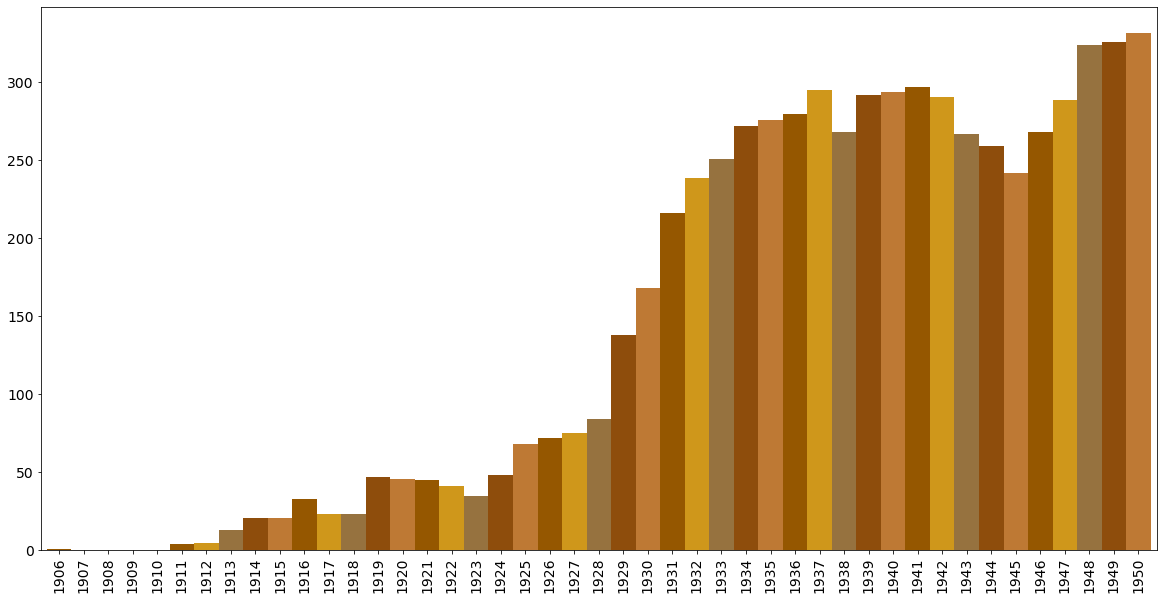

In [16]:
mvs_per_year['nmb_movies'].plot(kind='bar', width=1, figsize=(20,10),
                                color=['#955700', '#CF971B', '#96723F', '#8E4D0C', '#BE7934'],
                                fontsize = 14)

<br>

Average duration:

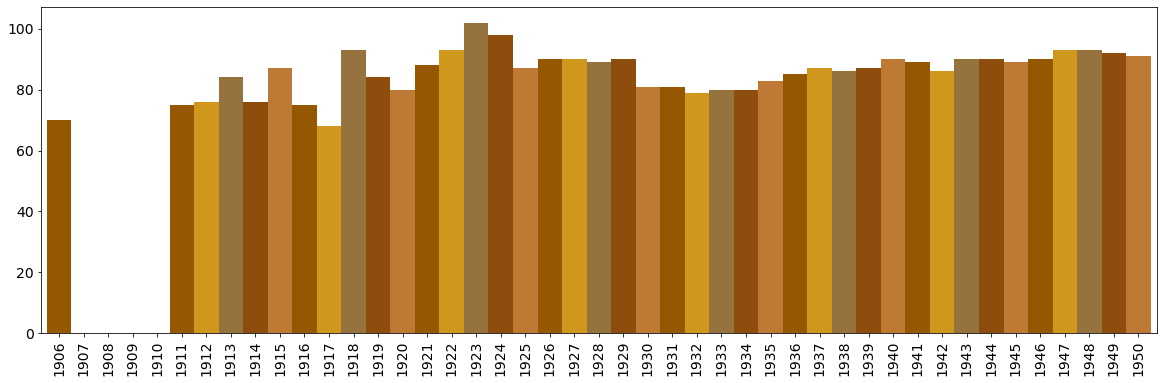

In [17]:
mvs_per_year['av_duration'].plot(kind='bar', width=1, figsize=(20,6),
                                 color=['#955700', '#CF971B', '#96723F', '#8E4D0C', '#BE7934'],
                                fontsize = 14)

<br>

Average rating of all movies per year:

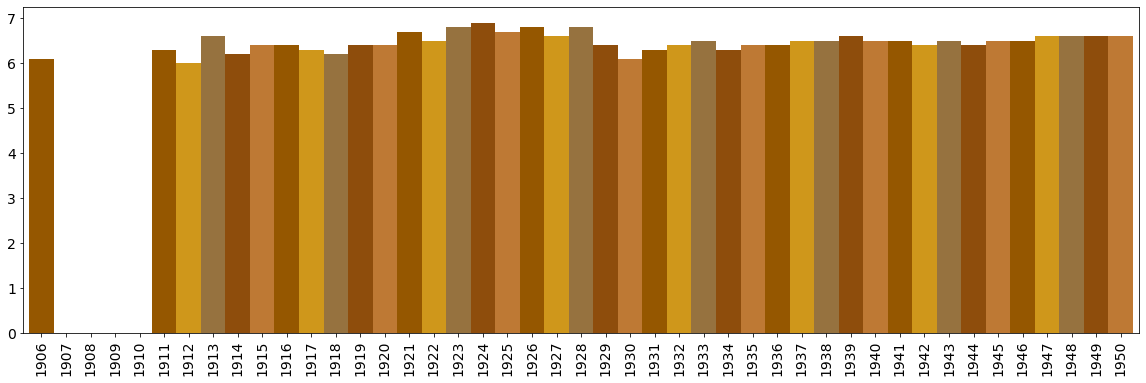

In [18]:
mvs_per_year['av_rating_per_year'].plot(kind='bar', width=1, figsize=(20,6),
                                        color=['#955700', '#CF971B', '#96723F', '#8E4D0C', '#BE7934'],
                                        fontsize = 14)

<br>

Average number of ratings per movie during a year<br>
(*that determines average popularity among viewers movies of this year*):

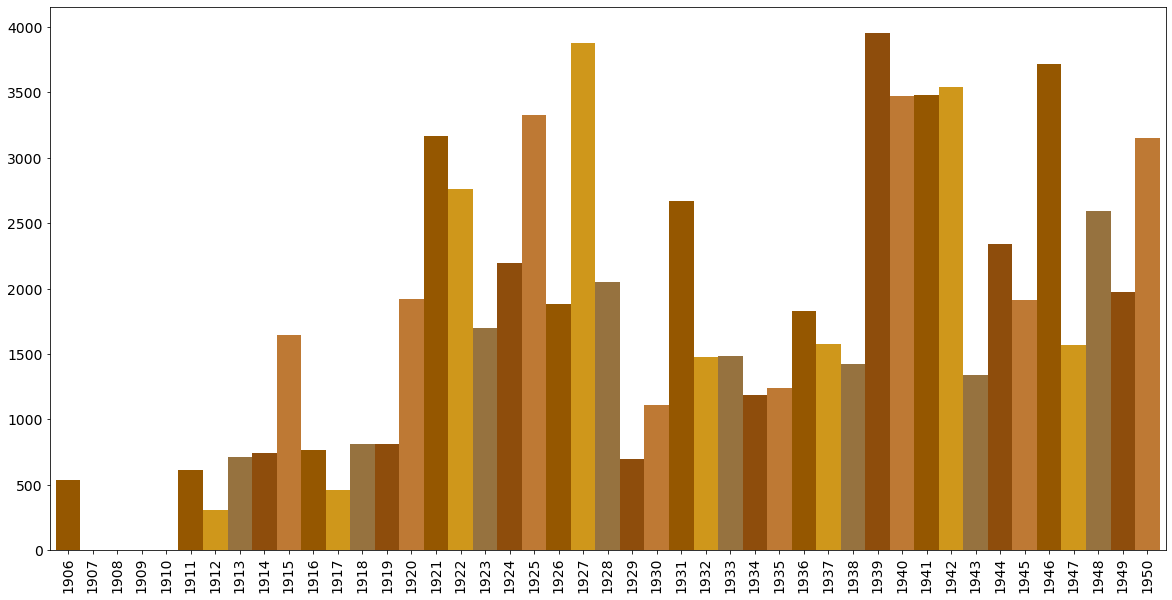

In [19]:
mvs_per_year['av_nmb_ratings'].plot(kind='bar', width=1, figsize=(20,10),
                                    color=['#955700', '#CF971B', '#96723F', '#8E4D0C', '#BE7934'],
                                    fontsize = 14)

<br>

Average number of reviews<br>
(*that means average popularity among viewers*):

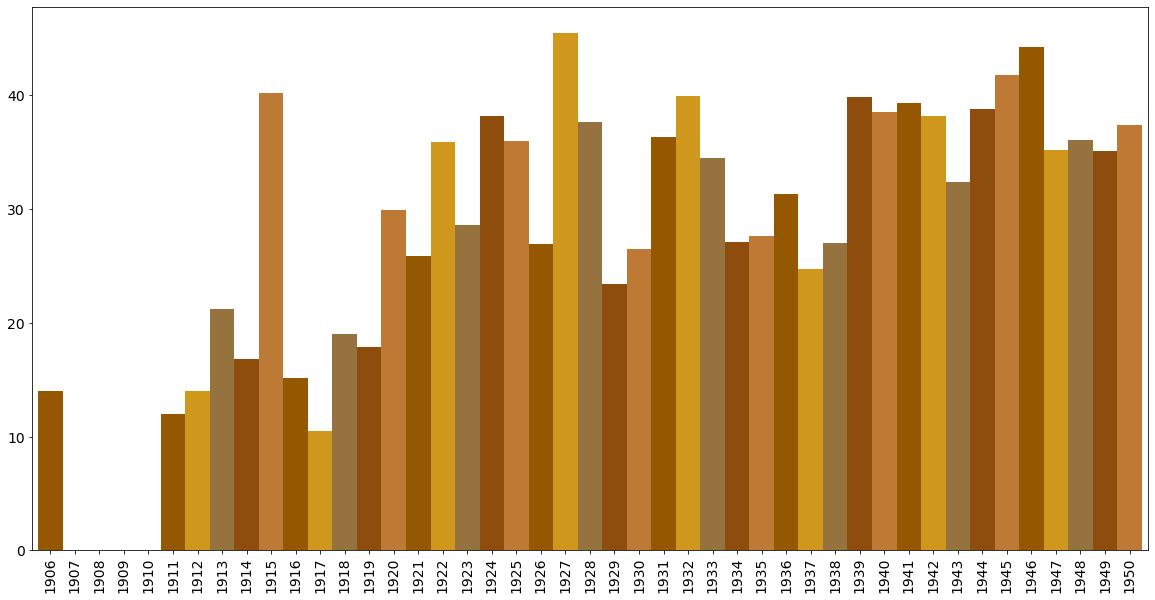

In [20]:
mvs_per_year['av_nmb_reviews'].plot(kind='bar', width=1, figsize=(20,10),
                                    color=['#955700', '#CF971B', '#96723F', '#8E4D0C', '#BE7934'],
                                    fontsize = 14)

<br>

Correlation between **average** number of ratings per year and **average number** of reviews per year:

In [21]:
crl = mvs_per_year['av_nmb_ratings'].corr(mvs_per_year['av_nmb_reviews'])

round(crl, 3)

0.836

#### <br>
<br>

#### Goal 2: Genres of movies during the period

In [22]:
mvs_by_genres = pd.concat([mvs['title'],
                           mvs['year'],
                           mvs['genre'].str.split(', ', expand=True)
                          ], axis=1)

mvs_by_genres.head()

,title,year,0,1,2
imdb_id,,,,,
tt0000574,The Story of the Kelly Gang,1906,Biography,Crime,Drama
tt0191323,Oborona Sevastopolya,1911,History,War,None
tt0002130,L'Inferno,1911,Adventure,Drama,Fantasy
tt0266688,Karadjordje,1911,Drama,War,None
tt0001892,Den sorte drøm,1911,Drama,None,None


<br>

Number of movies of different genres.<br>
(*At first, I separately count number of movies in each column, them summarize results in each row, then transfort type of data from float to integer. I'm sure that there's more easy way, but I don't know it.*)

In [23]:
number_genres = mvs_by_genres.iloc[:, 2:].apply(pd.value_counts).sum(axis=1) \
                                         .astype('int').sort_values(ascending=False)
number_genres

Drama        3735
Comedy       2297
Romance      1926
Crime        1136
Adventure     779
Mystery       607
Musical       588
Action        576
Film-Noir     408
War           382
Western       347
Thriller      278
Horror        244
Music         243
History       236
Fantasy       217
Biography     179
Family        156
Sci-Fi         92
Sport          72
Animation      32
dtype: int64

<br>

Number of movies per genres:

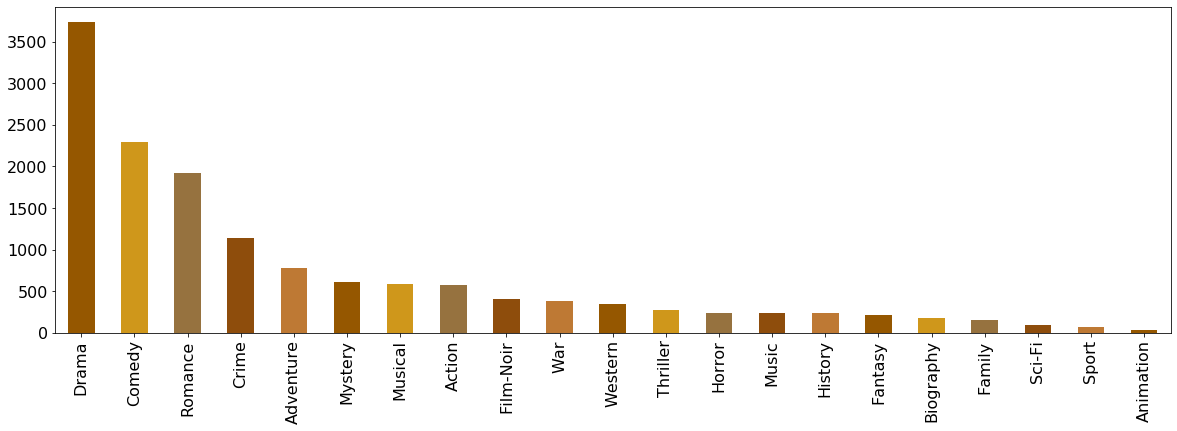

In [24]:
number_genres.plot(kind='bar', figsize=(20, 6),
                   color=['#955700', '#CF971B', '#96723F', '#8E4D0C', '#BE7934'],
                   fontsize = 16)

<br>
<br>

#### Goal 3: Movies of definite genre per year

In [25]:
gnr = 'Animation'

Select movies that contain defined genre in the column 'genres'

In [26]:
mvs_of_genre = mvs[mvs['genre'].str.contains(gnr)]

mvs_of_genre.head()

,title,year,genre,av_rating,nmb_ratings,reviews,duration,country,language,description
imdb_id,,,,,,,,,,
tt0015532,Die Abenteuer des Prinzen Achmed,1926,"Animation, Adventure, Fantasy",7.8,4872,88,81,Germany,None,A handsome prince rides a flying horse to fara...
tt0021025,King of Jazz,1930,"Animation, Comedy, Music",6.8,930,62,99,USA,English,American Pre-Code color film starring Paul Whi...
tt0025263,Hollywood Party,1934,"Animation, Comedy, Musical",6.2,705,48,68,USA,English,Jimmy Durante is jungle star Schnarzan the Con...
tt0026793,Novyy Gulliver,1935,"Animation, Adventure, Comedy",6.8,229,7,75,Soviet Union,Russian,"While hearing the story of ""Gulliver's Travels..."
tt0029583,Snow White and the Seven Dwarfs,1937,"Animation, Family, Fantasy",7.6,168735,395,83,USA,English,Exiled into the dangerous forest by her wicked...


<br>

Count number of movies with defined genre per year:

In [27]:
number_mvs_of_genre = mvs_of_genre.groupby('year').size()

number_mvs_of_genre.head()

year
1926    1
1930    1
1934    1
1935    1
1937    2
dtype: int64

<br>

Years of the oldest and latest movies of defined genre:

In [28]:
year_genre_oldest = number_mvs_of_genre.index.min()
year_genre_latest = number_mvs_of_genre.index.max()

year_genre_oldest, year_genre_latest

(1926, 1950)

<br>

Handle details of the Series:
* Fill in years without data with NaN values
* Replace NaN by 0
* Transform type from float to int

In [29]:
number_mvs_of_genre = pd.Series(number_mvs_of_genre, index=range(year_genre_oldest, year_genre_latest+1))
number_mvs_of_genre.fillna(0, inplace=True)
number_mvs_of_genre = number_mvs_of_genre.astype('int')

number_mvs_of_genre.head()

1926    1
1927    0
1928    0
1929    0
1930    1
dtype: int64

Total number of movies of defined genre in defined perios:

In [30]:
number_mvs_of_genre.sum()

32

<br>

Number of movies of defined genre per year:

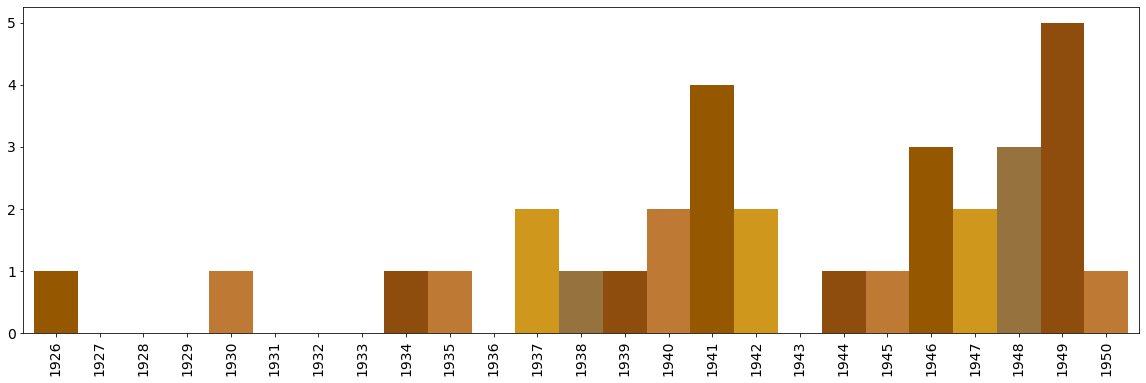

In [31]:
number_mvs_of_genre.plot(kind='bar', width=1, figsize=(20,6),
                         color=['#955700', '#CF971B', '#96723F', '#8E4D0C', '#BE7934'],
                         fontsize = 14)

<br>
<br>

#### Goal 3-extended: Comparison of movies of several genres

In [32]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 8)  # plt.rc('figure', figsize=(20, 6))
plt.rcParams['font.size'] = 14            # plt.rc('font', size=14)

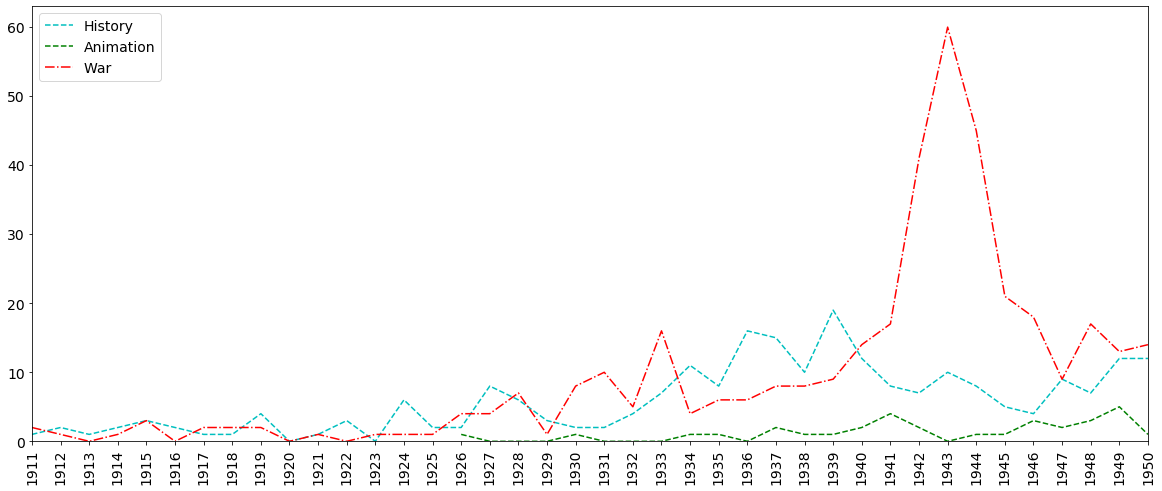

In [33]:
gnrs = ['History', 'Animation', 'War']

year_graph_oldest = 1911 #year_begin
year_graph_latest = year_end

styles = ['c--', 'g--', 'r-.', 'm:', 'b--', 'y', 'b:']

for i, gnr in enumerate(gnrs):
    mvs_with_gnr = mvs_by_genres[(mvs_by_genres.iloc[:, 2:] == gnr).any(axis=1)]
    number_mvs_of_genre = mvs_with_gnr.groupby('year').size()
    
    year_genre_oldest = mvs_with_gnr['year'].min()
    year_genre_latest = mvs_with_gnr['year'].max()
    
    number_mvs_of_genre = pd.Series(number_mvs_of_genre,
                                    index=range(year_genre_oldest, year_genre_latest+1))
    number_mvs_of_genre.fillna(0, inplace=True)
    number_mvs_of_genre = number_mvs_of_genre.astype('int')

    plt.plot(number_mvs_of_genre.index, number_mvs_of_genre, styles[i], label=gnr)

plt.xlim(year_graph_oldest, year_graph_latest)
plt.ylim(0)

labels = range(year_graph_oldest, year_graph_latest+1)
plt.xticks(labels, rotation='vertical')

plt.legend(loc='upper left')
plt.show()

<br>
<br>

#### Goal 4: Combination of defined genre with other genres

Select movies with defined genre. For that we use already created  DataFrame 'mvs_with_gnr'.<br>
(*Using 'mvs_of_genre' would be simpler way, but boring in terms of programming.*)

In [34]:
mvs_with_gnr = mvs_by_genres[(mvs_by_genres.iloc[:, 2:] == gnr).any(axis=1)]

assert len(mvs_with_gnr) == number_mvs_of_genre.sum(), 'something wrong with number of movies'

mvs_with_gnr.head()

,title,year,0,1,2
imdb_id,,,,,
tt0191323,Oborona Sevastopolya,1911,History,War,None
tt0266688,Karadjordje,1911,Drama,War,None
tt0002452,Independenta Romaniei,1912,History,War,None
tt0003131,Maudite soit la guerre,1914,Drama,War,None
tt0005719,Martyrs of the Alamo,1915,Drama,History,War


<br>

Count number of adjacent genres. Delete from resulted Series initial genre.

In [35]:
number_adjacent_genres = mvs_with_gnr.iloc[:, 2:].apply(pd.value_counts).sum(axis=1) \
                                                 .astype('int').sort_values(ascending=False)

number_adjacent_genres.drop(gnr, inplace=True)
#alternative: del number_adjacent_genres[gnr]

number_adjacent_genres

Drama        305
Romance       94
Comedy        53
History       30
Adventure     23
Action        22
Thriller      19
Musical       11
Biography      6
Music          4
Fantasy        2
Crime          2
Sci-Fi         2
Western        2
Horror         1
Family         1
Mystery        1
dtype: int64

<br>

Number of adjacent genres:

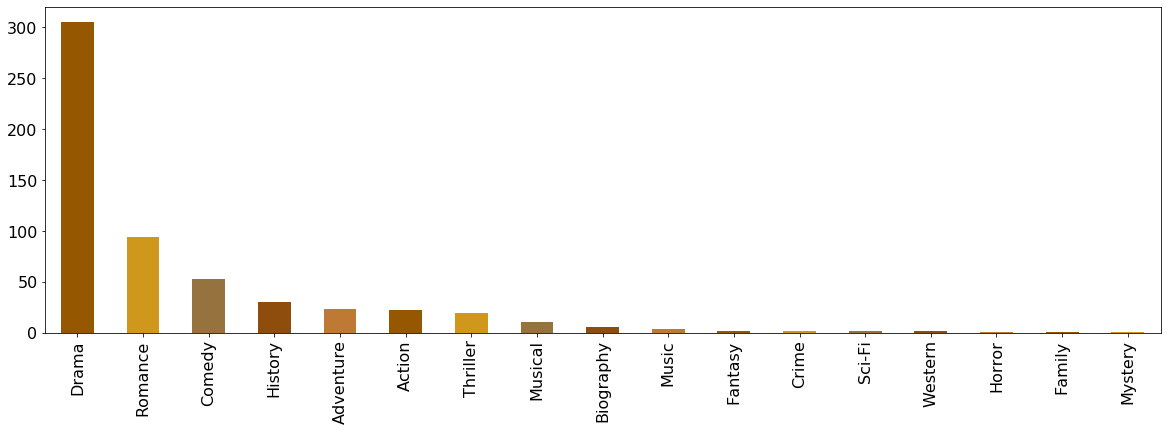

In [36]:
number_adjacent_genres.plot(kind='bar', figsize=(20,6),
                            color=['#955700', '#CF971B', '#96723F', '#8E4D0C', '#BE7934'],
                            fontsize = 16)

Number of movies without adjacent genres:<br>
(*I use trick that in such case the second column of genre contains 'None'*)

In [37]:
len(mvs_with_gnr[mvs_with_gnr[1].isnull()])

3

<br>
<br>

#### Goal 5: Movies per country

In [38]:
mvs_by_country = pd.concat([mvs['title'],
                            mvs['year'],
                            mvs['country'].str.split(', ', expand=True)
                           ], axis=1)

mvs_by_country.head()

,title,year,0,1,2
imdb_id,,,,,
tt0000574,The Story of the Kelly Gang,1906,Australia,None,None
tt0191323,Oborona Sevastopolya,1911,Russia,None,None
tt0002130,L'Inferno,1911,Italy,None,None
tt0266688,Karadjordje,1911,Serbia,None,None
tt0001892,Den sorte drøm,1911,Germany,Denmark,None


In [39]:
number_countries = mvs_by_country.iloc[:, 2:].apply(pd.value_counts).sum(axis=1) \
                                             .astype('int').sort_values(ascending=False)

# filter 'number_countries' to include only frequent languages
if len(number_countries) > 16:
    threshold = number_countries[15]
    number_countries = number_countries[number_countries >= threshold]
    
number_countries

USA               5095
UK                 472
France             279
Germany            191
Soviet Union       102
Italy               99
Japan               93
Mexico              63
Sweden              52
Czechoslovakia      27
Finland             23
Denmark             18
Hungary             16
Spain               16
China               15
Norway              13
dtype: int64

<br>

Number of movies per country:

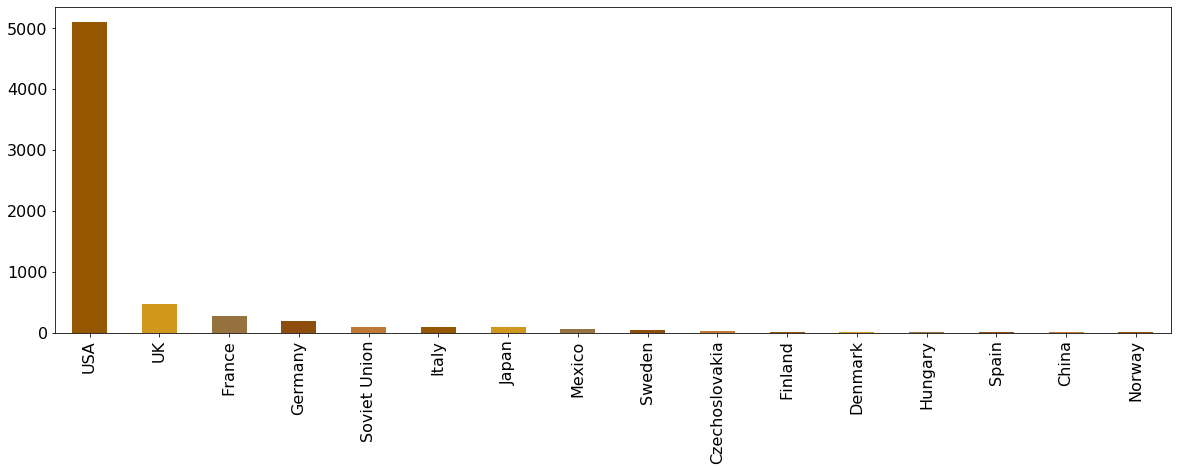

In [40]:
number_countries.plot(kind='bar', figsize=(20, 6),
                      color=['#955700', '#CF971B', '#96723F', '#8E4D0C', '#BE7934'],
                      fontsize = 16)

<br>
<br>

#### Goal 5-extended: comparison of movie production in different countries

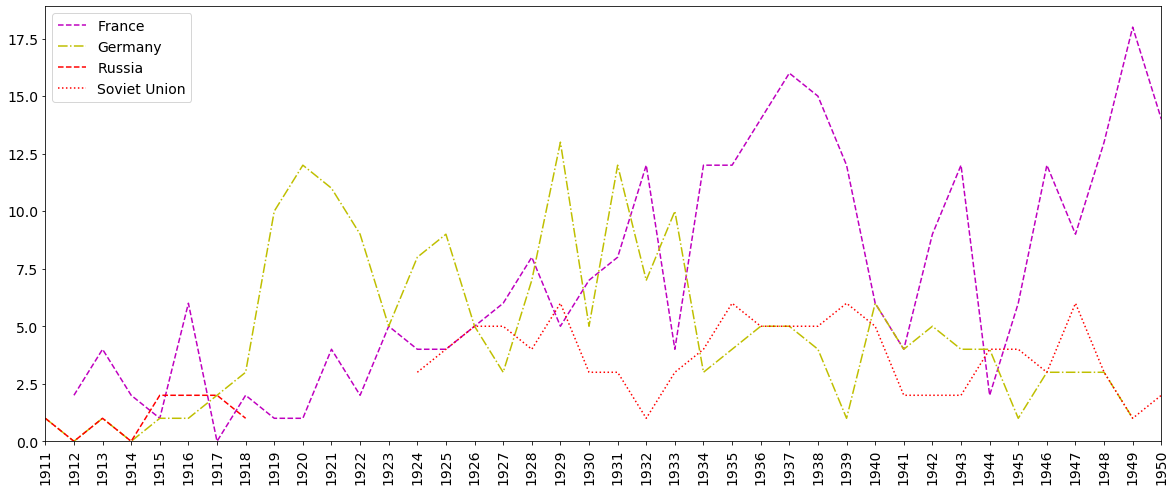

In [41]:
countries = ['France', 'Germany','Russia', 'Soviet Union']

year_graph_oldest = 1911 #year_begin
year_graph_latest = year_end

styles = ['m--', 'y-.', 'r--', 'r:', 'g:', 'b--', 'm:']

for i, country in enumerate(countries):
    mvs_of_country = mvs_by_country[(mvs_by_country.iloc[:, 2:] == country).any(axis=1)]
    number_mvs_of_country = mvs_of_country.groupby('year').size()
    
    year_country_oldest = mvs_of_country['year'].min()
    year_country_latest = mvs_of_country['year'].max()
    
    number_mvs_of_country = pd.Series(number_mvs_of_country,
                                      index=range(year_country_oldest, year_country_latest+1))
    number_mvs_of_country.fillna(0, inplace=True)
    number_mvs_of_country = number_mvs_of_country.astype('int')

    plt.plot(number_mvs_of_country.index, number_mvs_of_country, styles[i], label=country)

plt.xlim(year_graph_oldest, year_graph_latest)
plt.ylim(0)

labels = range(year_graph_oldest, year_graph_latest+1)
plt.xticks(labels, rotation='vertical')

plt.legend(loc='upper left')
plt.show()

<br>
<br>

#### Goal 6: Movies per language

In [42]:
mvs_by_language = pd.concat([mvs['title'],
                             mvs['year'],
                             mvs['language'].str.split(', ', expand=True)
                            ], axis=1)

mvs_by_language.head()

,title,year,0,1,2,3,4,5,6
imdb_id,,,,,,,,,
tt0000574,The Story of the Kelly Gang,1906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tt0191323,Oborona Sevastopolya,1911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tt0002130,L'Inferno,1911,Italian,None,None,None,None,None,None
tt0266688,Karadjordje,1911,Serbian,None,None,None,None,None,None
tt0001892,Den sorte drøm,1911,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
number_languages = mvs_by_language.iloc[:, 2:].apply(pd.value_counts).sum(axis=1) \
                                              .astype('int').sort_values(ascending=False)

# filter 'number_languages' to include only frequent languages
if len(number_languages) > 16:
    threshold = number_languages[15]
    number_languages = number_languages[number_languages >= threshold]

number_languages

English       5471
French         580
German         370
Spanish        239
Italian        196
Russian        131
Japanese        99
Swedish         45
Latin           35
Portuguese      30
Czech           29
Mandarin        25
Hungarian       24
Finnish         22
Yiddish         17
Arabic          16
dtype: int64

<br>

Number of movies per language:

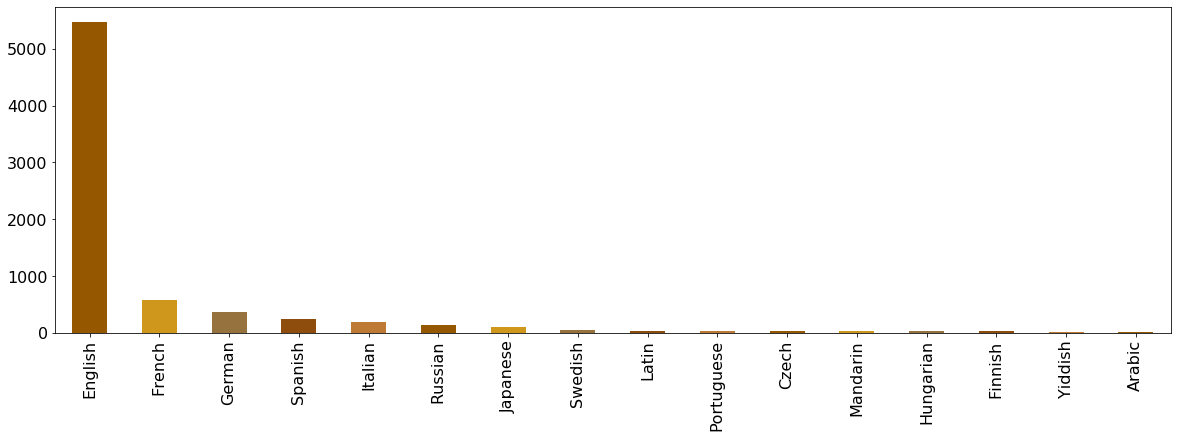

In [49]:
number_languages.plot(kind='bar', figsize=(20, 6),
                      color=['#955700', '#CF971B', '#96723F', '#8E4D0C', '#BE7934'],
                      fontsize = 16)

Number of movies without declared language:

In [45]:
mvs_by_language[0].isnull().sum()

217